# Decision Tree Classification Model

This notebook demonstrates how to build and visualize a decision tree classifier using scikit-learn. I use the iris dataset as an example, but the code can be adapted for other datasets.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

## 1. Load and Prepare Data

In [2]:
# Load the iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Display first few rows of the dataset
print("Features:")
print(X.head())
print("\nTarget classes:", np.unique(y))

Features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target classes: [0 1 2]


## 2. Split Data into Training and Testing Sets

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 120
Testing set size: 30


## 3. Create and Train the Decision Tree Model

In [4]:
# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

## 4. Model Evaluation

Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



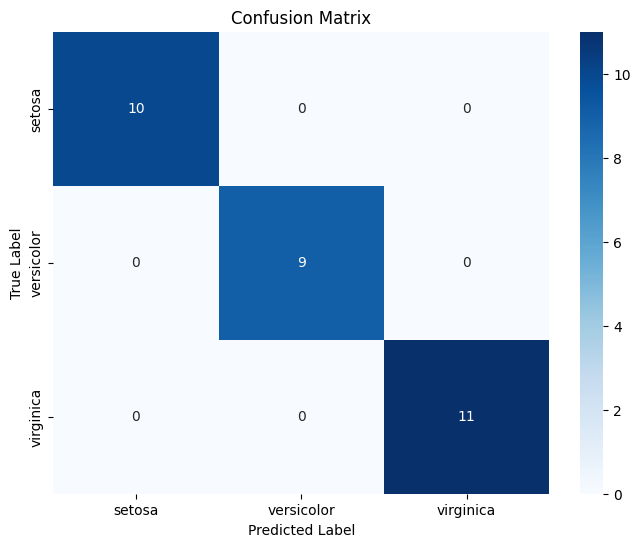

In [5]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## 5. Feature Importance Analysis

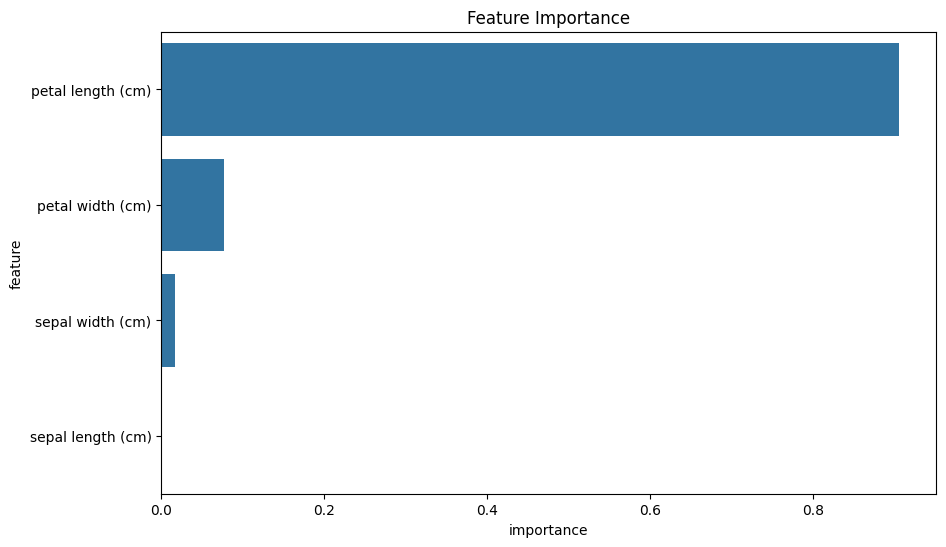

In [6]:
# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': dt_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

## 6. Decision Tree Visualization

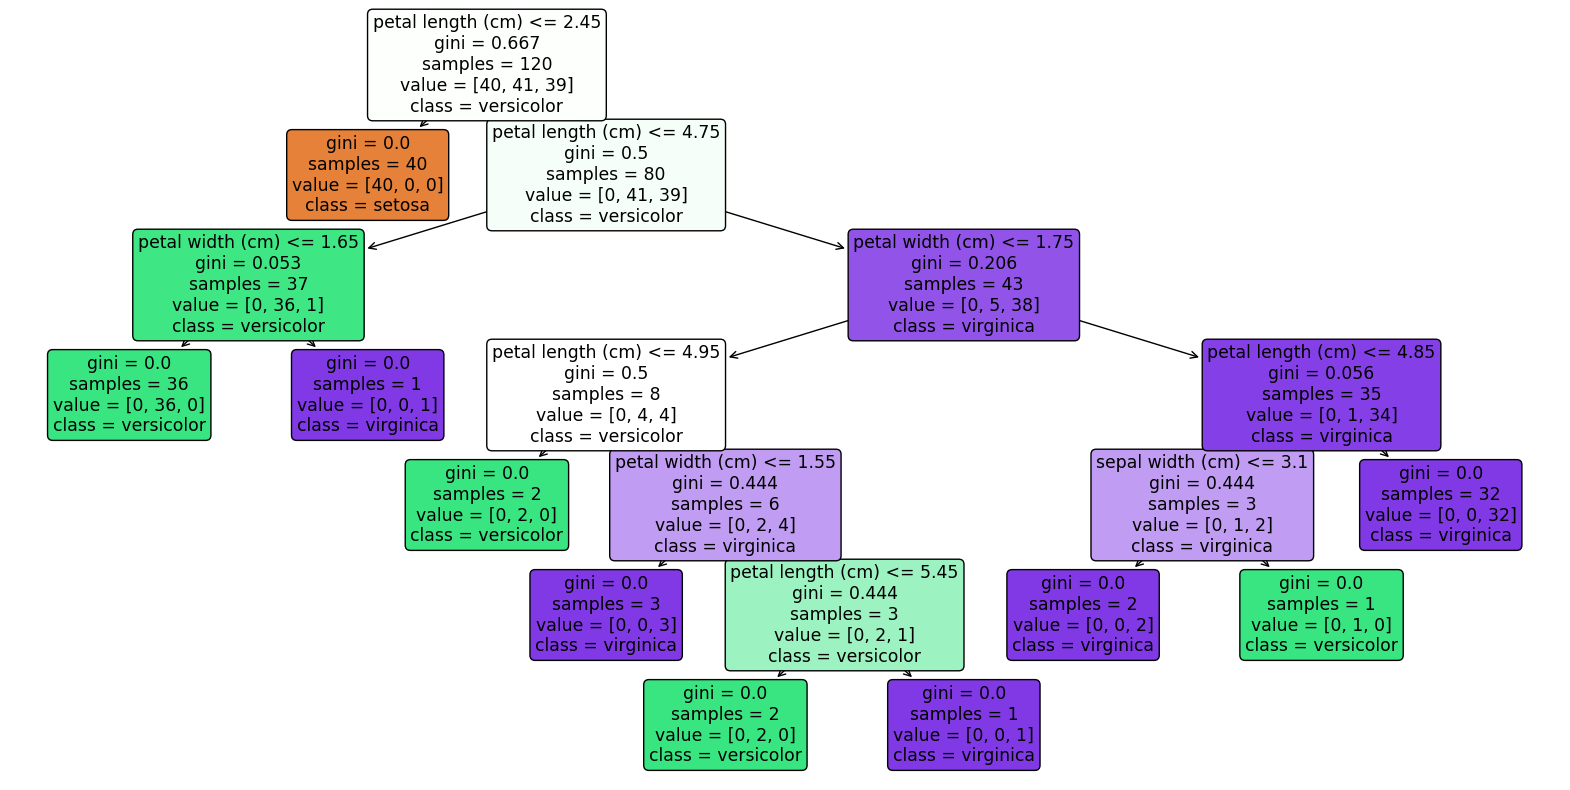

In [7]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=iris.feature_names, 
          class_names=iris.target_names, filled=True, rounded=True)
plt.show()

## 7. Model Tuning (Optional)

If the model's performance needs improvement, we can tune hyperparameters such as:
- max_depth
- min_samples_split
- min_samples_leaf

Here's an example of creating a model with specific parameters:

Tuned Model Accuracy: 1.00


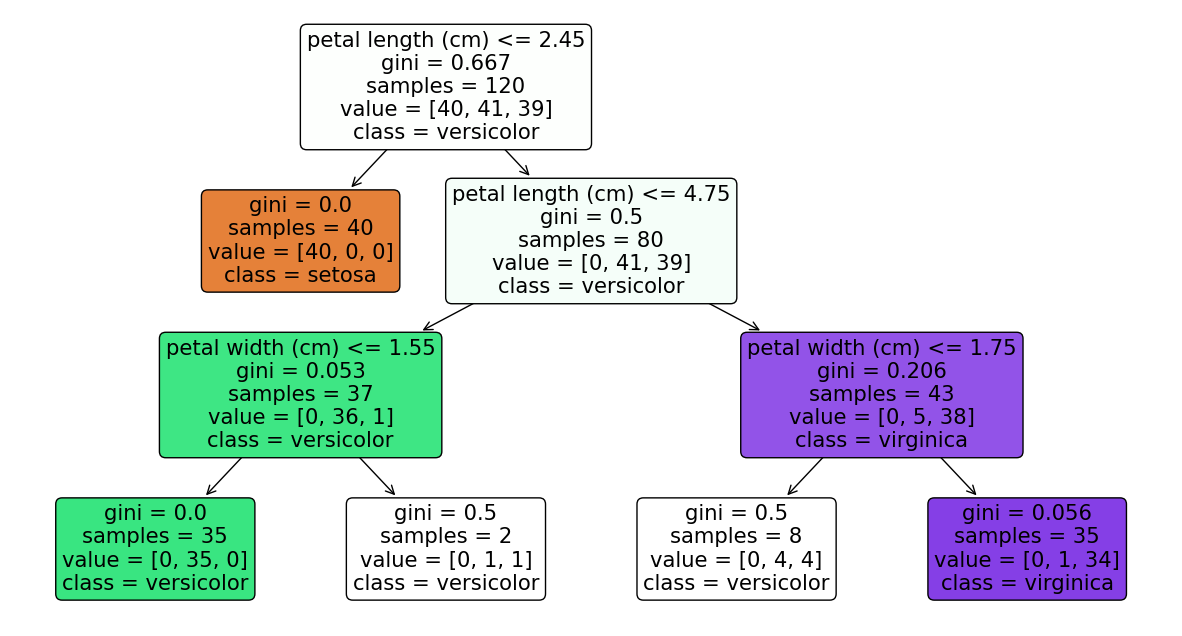

In [8]:
# Create a tuned decision tree
tuned_dt = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Train and evaluate the tuned model
tuned_dt.fit(X_train, y_train)
tuned_pred = tuned_dt.predict(X_test)
tuned_accuracy = accuracy_score(y_test, tuned_pred)
print(f"Tuned Model Accuracy: {tuned_accuracy:.2f}")

# Visualize the tuned decision tree
plt.figure(figsize=(15,8))
plot_tree(tuned_dt, feature_names=iris.feature_names, 
          class_names=iris.target_names, filled=True, rounded=True)
plt.show()